# AM207 Homework 2

##### Data: wine_quality_missing.csv

**Harvard University**<br>
**Fall 2018**<br>
**Instructors: Rahul Dave**<br>
**Due Date: ** Saturday, September 22nd, 2018 at 11:59pm

**Instructions:**

- Upload your final answers in the form of a Jupyter notebook containing all work to Canvas.

- Structure your notebook and your work to maximize readability.

In [103]:
import numpy as np
import scipy.stats
import scipy.special

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from matplotlib import cm
import pandas as pd
import seaborn as sns
%matplotlib inline

sns.set(rc={'figure.figsize':(16, 12)})

## Question 1: Give Me the Full Monte, Carlo Ancelotti

**Coding required**

In the quiet moments that transpire just before the sun rises that find us taking the walk of shame we can only send up quiet prayers to deities unknown that our path has not unknowingly taken us down the Boulevard of Broken Dreams (*Green Day*).  Along this road you'll find scattered the shattered hearts of formerly aspiring humorists -- the sorts of folk who might admire "the giggle at a funeral" (*Hozier*) distributed according to the function $\heartsuit(\theta) \sim \frac{ {\rm sin^{24}}\theta}{\theta^2}$ from $0< \theta< \infty$ and otherwise.  As a current aspiring humorist, it is your job to try to integrate $\heartsuit(\theta)$ in order to size up the jar you'll take with you as you go heart collecting (*Christina Perri*).  Who do you think you are anyway?

1.1. Visualize $\heartsuit(\theta)$.  Make sure your plot includes a title and axes labels.

1.2. The domain of $\heartsuit(\theta)$ is unbounded.  The version of Monte Carlo that we've explored so far requires a bounded domain.  Make an argument that we can integrate this function over the bounded domain [0, M] and get an accurate result.  What value of M should you choose to get a result within 0.001 of the exact solution?

1.3. Write a function `simulate_heart_collection` to estimate $\int_{0}^{\infty}\heartsuit (\theta) $ using the standard Monte Carlo method with $N=100000$.  Use the bounds you justified in 1.2.  What is your estimate?

1.4. It turns out that integrals of the form $\int_{0}^{\infty} \frac{ {\rm sin}x^{2n}}{x^2} dx$ have the closed form solution $\frac{\pi}{2^{2n-1}} \binom{2n-2}{n-1}$.  How accurate was your estimate?

1.5. The teaching staff of AM 207 has gone on and on in class and lab about putting error bars on estimates and finding confidence intervals.  In order to do this you need to run your experiment a number of times. Repeat your estimation process 1000 times and plot a histogram of your results marking the exact answer and your estimate with a vertical line.  

1.6. Based on your experiments, find the standard error of your estimate as well as a 95% confidence interval.  Was the true value of $\int_{0}^{\infty}\heartsuit (\theta)$ within the 95% confidence interval?

1.7. It turns out that an appropriately chosen change of variables will allow you to estimate the integral on the part of the domain you truncated in 1.2 and 1.3.  Execute this change of variables and use monte carlo integration to evaluate $\int_{M}^{\infty}\heartsuit (\theta) $

1.8. Based on your answer in 1.7 was your choice of M justified? 

### Answers

<div class="answer-separator">
------------------------
</div>

<h4>1.1. Visualize $\heartsuit(\theta)$.  Make sure your plot includes a title and axes labels.</h4>

<div class="answer">

<br>
*Your Answer Here*
<br>

</div>

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


Text(0.5,1,'$\\heartsuit(\\theta)$ as function of $\\theta$')

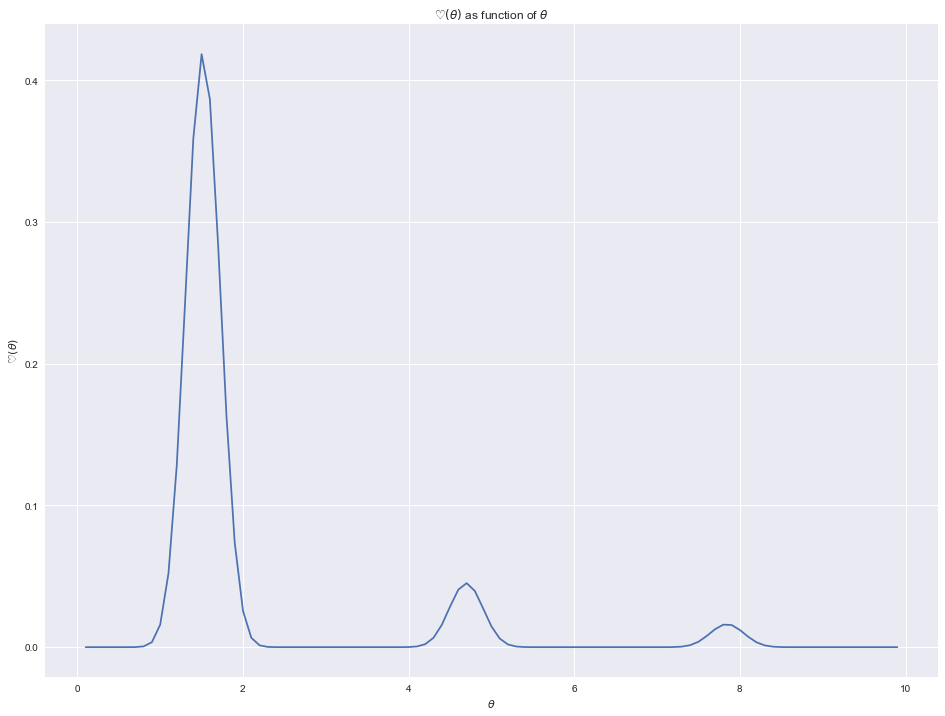

In [104]:
f = lambda theta: np.power(np.sin(theta), 24) / np.power(theta, 2)
thetas = np.arange(0, 10, 0.1)
plt.plot(thetas, f(thetas))
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\heartsuit(\theta)$')
plt.title(r'$\heartsuit(\theta)$ as function of $\theta$')

<div class="answer-separator">
------------------------
</div>

<h4>1.2. The domain of $\heartsuit(\theta)$ is unbounded.  The version of Monte Carlo that we've explored so far requires a bounded domain.  Make an argument that we can integrate this function over a bounded domain and get an accurate result.  What bounds should you choose to get a result within 0.001 of the exact solution?</h4>

<div class="answer">

<br>
We can get a very crude estimate by using the general inequality $\int f(x) dx \leq \int g(x) dx$ if $f(x) \leq g(x) \forall x$. Use $f(x) = \heartsuit(x)$, $g(x) = \frac{1}{x^2}$. Then

$$\int_M ^ \infty \heartsuit(x) dx \leq \int_M ^ \infty \frac{1}{x^2} dx = -\frac{1}{3} x ^ 3 \bigg\rvert_M ^ \infty = \frac{1}{3M} \:.$$

We want $\frac{1}{3M} = 0.001 \Leftrightarrow M \approx 333$. These bounds work since all functions involved are non-negative.
<br>

</div>

<div class="answer-separator">
------------------------
</div>

<h4>1.3. Write a function `simulate_heart_collection` to estimate $\int_{0}^{\infty}\heartsuit (\theta) $ using the standard Monte Carlo method with $N=100000$.  Use the bounds you justified in 1.2.  What is your estimate?</h4>

<div class="answer">

<br>
<br>

</div>

In [105]:
def simulate_heart_collection(N, M=333, seed=1):
    """
    Simulate 
    """
    np.random.seed(seed)
    x = np.random.uniform(low=0, high=M, size=N)
    y = f(x)
    return y.mean() * M
    
simulate_heart_collection(100000)

0.2582553621026845

<div class="answer-separator">
------------------------
</div>

<h4>1.4. It turns out that integrals of the form $\int_{0}^{\infty} \frac{ {\rm sin}x^{2n}}{x^2} dx$ have the closed form solution $\frac{\pi}{2^{2n-1}} \binom{2n-2}{n-1}$.  How accurate was your estimate?</h4>

In [106]:
n = 12
exact = np.pi / (np.power(2, 2 * n - 1)) * scipy.special.binom(2 * n - 2, n - 1)
exact

0.26418924198235927

<div class="answer">

<br>
We came close to around 0.5. By the computation above, this must come from sampling variation.
<br>

</div>

<div class="answer-separator">
------------------------
</div>

<h4>1.5. The teaching staff of AM 207 has gone on and on in class and lab about putting error bars on estimates and finding confidence intervals.  In order to do this you need to run your experiment a number of times.  Repeat your estimation process 1000 times and plot a histogram of your results marking the exact answer and your estimate with a vertical line.</h4>

<div class="answer">

<br>
*Your Answer Here*
<br>

</div>

In [107]:
repeated = [simulate_heart_collection(100000, seed=seed) for seed in range(1000)]


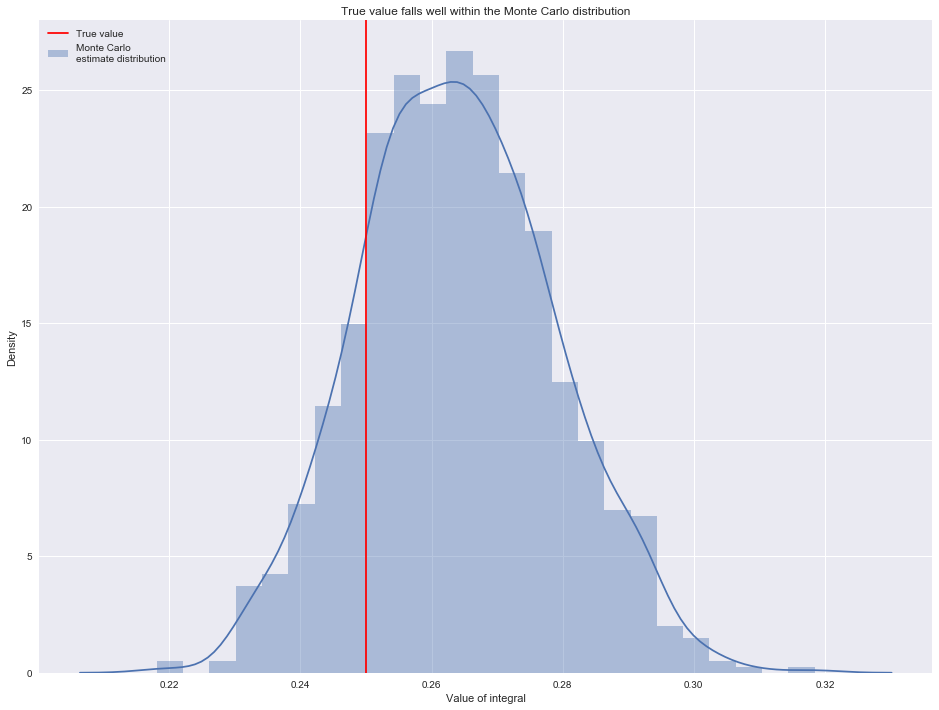

In [108]:
sns.distplot(repeated, label="Monte Carlo \nestimate distribution")
plt.axvline([0.25], color='r', label="True value")
plt.title("True value falls well within the Monte Carlo distribution")
plt.xlabel("Value of integral")
plt.ylabel("Density")
plt.legend(loc='upper left')

<div class="answer-separator">
------------------------
</div>

<h4>1.6. Based on your experiments, find the standard error of your estimate as well as a 95% confidence interval.  Was the true value of $\int_{0}^{\infty}\heartsuit (\theta)$ within the 95% confidence interval?</h4>

<div class="answer">

<br>
*Your Answer Here*
<br>

</div>

In [127]:
print("Standard error is {:.3f}".format(np.std(repeated)))
print("95% confidence interval: {}".format(np.round(np.percentile(repeated, [2.5, 97.5]), decimals=3)))

Standard error is 0.015
95% confidence interval: [0.236 0.293]


The true value was well within the 95% confidence interval.

<div class="answer-separator">
------------------------
</div>

<h4>1.7. It turns out that an appropriately chosen change of variables will allow you to estimate the integral on the part of the domain you truncated in 1.2 and 1.3.  Execute this change of variables and use monte carlo integration to evaluate $\int_{M}^{\infty}\heartsuit (\theta) $
</h4>

<div class="answer">

<br>
*Your Answer Here*
<br>

</div>

<div class="answer-separator">
------------------------
</div>

<h4>1.8. Based on your answer in 1.7 was your choice of M justified?
</h4>

<div class="answer">

<br>
*Your Answer Here*
<br>

</div>

<div class="answer-separator">
------------------------
</div>

## Question 2: Rally to Me! 

**Some Coding required**

Suppose you observe the following data set $\mathbf{x}^{(0)} = (0.5, 2.5), \mathbf{x}^{(1)} = (3.2, 1.3), \mathbf{x}^{(2)} = (2.72, 5.84), \mathbf{x}^{(3)}= (10.047, 0.354)$. By convention, for any vector $\mathbf{x}$, we will denote the first component of $\mathbf{x}$ by $x_{1}$ and the second component by $x_{2}$. Suppose that the data is drawn from the same two-dimensional probability distribution with pdf $f_X$, that is, $\mathbf{x}^{(i)} \overset{iid}{\sim} f_X$, where
$$
f_X(\mathbf{x}) =  4\lambda_1^2 x_{1}x_{2} \mathrm{exp} \left\{-\lambda_0 (x^2_{1} + x^2_{2}) \right\}.
$$
You should assume that $\lambda_1, \lambda_0 > 0$ and that $f_X$ is supported on the nonnegative quandrant of $\mathbb{R}^2$ (i.e. $f_X$ is zero when either component is negative). 

2.1. What are the values for $\lambda_0$ and $\lambda_1$ that maximize the likelihood of the observed data?  **Support your answer with full and rigorous analytic derivations.**

2.2. Visualize the data along with the distribution you determined in 2.1 (in two dimensions or three).


### Answers

<div class="answer-separator">
------------------------
</div>

<h4>2.1. What are the values for $\lambda_0$ and $\lambda_1$ that maximize the likelihood of the observed data?</h4>

<div class="answer">

<br>
*Your Answer Here*
<br>

</div>

<div class="answer-separator">
------------------------
</div>

<h4>2.2. Visualize the data along with the distribution you determined in 2.1 (in two dimensions or three).</h4>

<div class="answer">

<br>
*Your Answer Here*
<br>

</div>

<div class="answer-separator">
------------------------
</div>

## Question 3: Still Missing! 

**Coding required**

Recall from Homework 1 Question 2 that we explored working with missing data using the wine quality dataset from the UCI Machine Learning Repository.  Re-Read the data in the `wine_quality_missing.csv` into a pandas dataframe and store the dataframe in the variable `wine_df`. 

3.1. Drop impute `wine_df` and re-calculate estimates of the mean and standard deviation of the values of the Ash feature in the drop imputed dataset.

3.2. Use non-parametric bootstrap on the drop imputed dataset to find the standard errors for both your mean and standard deviation estimates.

3.3. Mean impute `wine_df` and re-calculate estimates of the mean and standard deviation of the values of the Ash feature in the mean imputed dataset.

3.4. Use non-parametric bootstrap on the mean imputed dataset to find the standard errors for both your mean and standard deviation estimates.

3.5. Compare the standard errors between the two different types of imputation.  Do they differ?  If so what might be the cause of the difference?


### Answers

<div class="answer-separator">
------------------------
</div>

<h4>3.1. Drop impute `wine_df` and re-calculate estimates of the mean and standard deviation of the values of the Ash feature in the drop imputed dataset.</h4>

In [132]:
wine_df = pd.read_csv("../data/wine_quality_missing.csv")
drop_imputed = wine_df.dropna()

print("Mean and standard deviation of drop imputed Ash dataset:")
drop_imputed['Ash'].describe()[['mean', 'std']]

Mean and standard deviation of drop imputed Ash dataset:


mean    2.369767
std     0.303232
Name: Ash, dtype: float64

<div class="answer">

<br>
*Your Answer Here*
<br>

</div>

<div class="answer-separator">
------------------------
</div>

<h4>3.2. Use non-parametric bootstrap on the drop imputed dataset to find the standard errors for both your mean and standard deviation estimates.</h4>

In [183]:
def bootstrap_mean_std(x, N=1000):
    """
    Use non-parametric bootstrap to calculate mean and standard deviation
    of vector x.
    
    :param x: numpy array to bootstrad
    :param N: int number of boostrap iterations
    """
    bootstrapped = np.random.choice(x, size=(N, ) + np.shape(x))
    mean, std = np.std(np.mean(bootstrapped, axis=1)), np.std(np.std(bootstrapped, axis=1))
    return mean, std

bs_results = bootstrap_mean_std(drop_imputed['Ash'], 10000)
print("Standard error of mean is {:.3f}. Standard error of standard deviation is {:.3f}.".format(bs_results[0], bs_results[1]))

Standard error of mean is 0.046. Standard error of standard deviation is 0.037.


<div class="answer">

<br>
*Your Answer Here*
<br>

</div>

<div class="answer-separator">
------------------------
</div>

<h4>3.3. Mean impute `wine_df` and re-calculate estimates of the mean and standard deviation of the values of the Ash feature in the mean imputed dataset.</h4>

<div class="answer">

<br>
*Your Answer Here*
<br>

</div>

In [204]:
mean_imputed = wine_df.fillna(wine_df.mean())

print("Mean and standard deviation of mean imputed Ash dataset:")
mean_imputed['Ash'].describe()[['mean', 'std']]

Mean and standard deviation of mean imputed Ash dataset:


mean    2.366218
std     0.265022
Name: Ash, dtype: float64

<div class="answer-separator">
------------------------
</div>

<h4>3.4. Use non-parametric bootstrap on the mean imputed dataset to find the standard errors for both your mean and standard deviation estimates.</h4>

<div class="answer">

<br>
*Your Answer Here*
<br>

</div>

In [205]:
bs_results = bootstrap_mean_std(mean_imputed['Ash'], 10000)
print("Standard error of mean is {:.3f}. Standard error of standard deviation is {:.3f}.".format(bs_results[0], bs_results[1]))

Standard error of mean is 0.020. Standard error of standard deviation is 0.019.


<div class="answer-separator">
------------------------
</div>

<h4>3.5. Compare the standard errors between the two different types of imputation.  Do they differ?  If so what might be the cause of the difference?</h4>

There's quite a big difference between the standard errors:

Drop Imputed Mean  | Mean Imputed Mean | Drop Imputed Standard error | Mean imputed standard error
-------------------|-------------------|-----------------------------|------------------------------
0.046  | 0.020 |0.037 | 0.019

The reason is that we substitute a **single value** that is **equal to the mean** of the "Ash" column. This means that the imputed values do not contribute any variance of this column.

<div class="answer-separator">
------------------------
</div>